# Oppo Reno model Sentiment analysis

### Loading datasets for model training

In [1]:
from sklearn.datasets import load_files
datasets = load_files("txt_sentoken/") # Dataset from Cornell Computer Science

X,y = datasets.data,datasets.target

### Saving datasets as pickle file

In [2]:
import pickle
with open("X.pickle","wb") as f:
    pickle.dump(X,f)

with open("y.pickle","wb") as f:
    pickle.dump(y,f)

### Preprocessing

In [3]:
import re
with open("X.pickle","rb") as f:
    X = pickle.load(f)

with open("y.pickle","rb") as f:
    y = pickle.load(f)
corpus = []
for i in range(len(X)):
    data = re.sub(r"\W"," ",str(X[i]))
    data = data.lower()
    data = re.sub(r"\s+[a-z]\s+"," ",data)
    data = re.sub(r"^[a-z]\s+"," ",data)
    data = re.sub(r"\s+"," ",data)
    corpus.append(data)

### Count Vectorization

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import warnings
warnings.filterwarnings("ignore")

vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6,stop_words= stopwords.words('english'))
X_vectzr = vectorizer.fit_transform(corpus).toarray()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TFIDF Transformation

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
Tfidf_trans = TfidfTransformer()
X_Tfidf = Tfidf_trans.fit_transform(X_vectzr).toarray()

### Model Training & Prediction

Accuracy: 0.845

******************-----------******************
Confusion Matrix


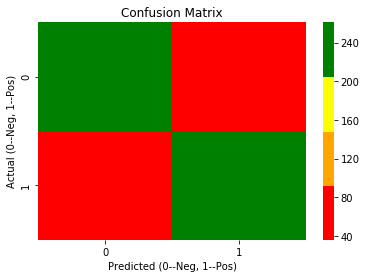

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X_train,X_test,Y_train,Y_test = train_test_split(X_Tfidf,y,test_size = 0.3, random_state = 0)

LogR_clf = LogisticRegression()
LogR_clf.fit(X_train,Y_train)
Y_predict = LogR_clf.predict(X_test)
print("Accuracy:",str(accuracy_score(Y_predict,Y_test)))
print("\n******************-----------******************\nConfusion Matrix")
sns.heatmap(confusion_matrix(Y_test,Y_predict),cmap = ["red","orange","yellow","green"])
plt.title("Confusion Matrix")
plt.ylabel("Actual (0--Neg, 1--Pos)")
plt.xlabel("Predicted (0--Neg, 1--Pos)")
plt.show()

### Pickling the classifier and vectorizer

In [7]:
# pickling the classifier
with open("LogR_cfl.pickle",'wb') as f:
    pickle.dump(LogR_clf,f)

# Creating TFIDF vectorizer for pickling
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import warnings
warnings.filterwarnings("ignore")

Tfidf_vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6,stop_words= stopwords.words('english'))
X_Tfidf_vectzr = Tfidf_vectorizer.fit_transform(corpus).toarray()

# pickling the Tfidf vectorizer  
with open("Tfidf_Vec.pickle",'wb') as f:
    pickle.dump(Tfidf_vectorizer,f)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Fetching tweets from twitter

In [8]:
# importing libraries
import tweepy
import re
from tweepy import OAuthHandler

# Initializing the keys
ckey="BJLMbUq7au6lFeNQF4QO2ZQsa"
csecret="a8v40HFNf5virM6dn1PDpw2HDtPXg53zRJ6ZQpzcWGVn8QEjZS"
atoken="1385264515-lwIlfXy8vTFG1rYfgON4MRtDpSCrK9F6deEuRio"
asecret="HFi76cndRAQYcoOU0Uy1evPw3V7P4HElGNU0jFkaCbOMF"

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken,asecret)
args = ["Oppo Reno"]
api = tweepy.API(auth,timeout = 15)
tweet_list = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q = query+" -filter:retweets",lang = "en", result_type = "recent").items(1000):
        tweet_list.append(status.text)

### Preprocessing for downloaded tweets

In [9]:
# Preprocessing the tweets
new_tweet_list = []
for tweet in tweet_list:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", str(tweet))
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    new_tweet_list.append(tweet)
    

### Unpickling classifier & vectorizer

In [10]:
# Unpickling classifier
with open("LogR_cfl.pickle",'rb') as f:
    cfl = pickle.load(f)
    
# Unpickling classifier
with open("Tfidf_Vec.pickle",'rb') as f:
    Tfidf_vec = pickle.load(f)
    

### Appling classifier

In [11]:
# appling classifier on each tweet
total_pos = 0
total_neg = 0
for tw in new_tweet_list:
    result = cfl.predict(Tfidf_vec.transform([tw]).toarray())
    if result[0] == 1:
        total_pos+=1
    else:
        total_neg+=1

### Plotting Final Analysis

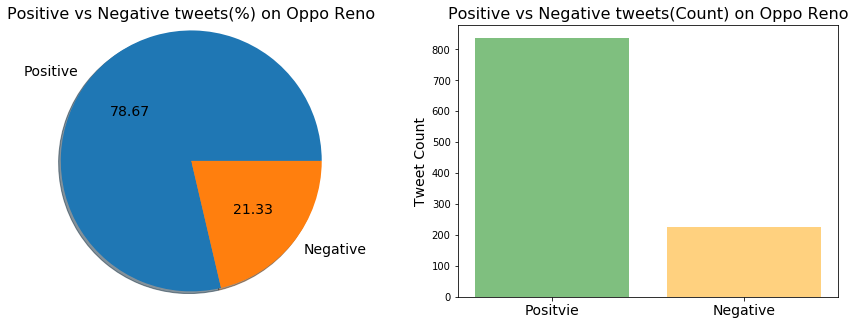

In [12]:

fig = plt.figure(figsize=(15,5))
#plotting pie chart
plt.subplot2grid((1,2),(0,0))
plt.pie(x = [total_pos,total_neg],
        labels = ["Positive",'Negative'],
        autopct = "%0.02f",shadow = True,radius = 1.2,textprops={'fontsize': 14})
plt.title("Positive vs Negative tweets(%) on Oppo Reno",fontsize= 16)

# plotting bar graph
plt.subplot2grid((1,2),(0,1),fig = fig)
plt.bar(x =[0,1],height = [total_pos,total_neg],alpha = 0.5,color = ["green","orange"])
plt.ylabel("Tweet Count",fontsize= 14)
plt.xticks([0,1],["Positvie","Negative"],fontsize= 14)
plt.title("Positive vs Negative tweets(Count) on Oppo Reno",fontsize= 16)
plt.show()